# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [34]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd


In [35]:
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url)
html_text = response.text

In [31]:
html = io.StringIO(response.text)  
tablas = pd.read_html(html)
print({len(tablas)})

{27}


In [32]:
df = tablas[0]
df.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.925,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.453,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.986,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.972,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.963,1 April 2022,[6]


In [33]:
df.columns

Index(['Rank', 'Song', 'Artist(s)', 'Streams (billions)', 'Release date',
       'Ref.'],
      dtype='object')

In [19]:
data_spotify = sqlite3.connect("spotify_top_songs.db")


In [20]:
df.to_sql("most_streamed", data_spotify, if_exists="replace", index=False)
cursor = data_spotify.cursor()

In [21]:
cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

data_spotify.commit()
data_spotify.close()

Rows inserted: 101


In [37]:
df['Streams (billions)'] = pd.to_numeric(df['Streams (billions)'], errors='coerce')

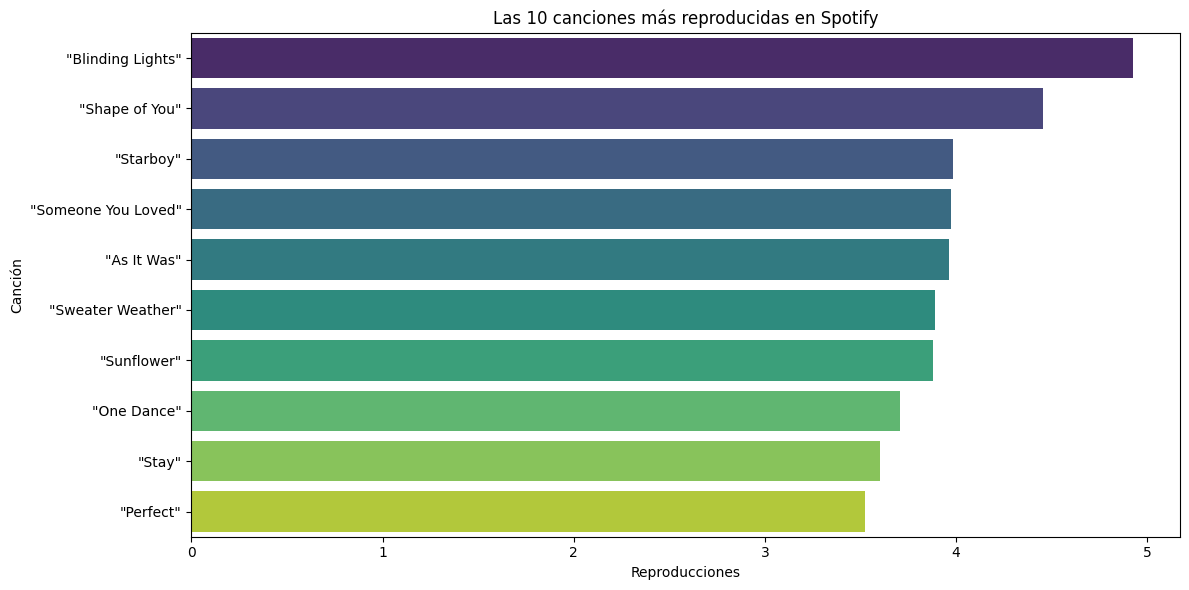

In [49]:
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="viridis", legend=False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()


In [46]:
artists = df["Artist(s)"].value_counts().nlargest(10)

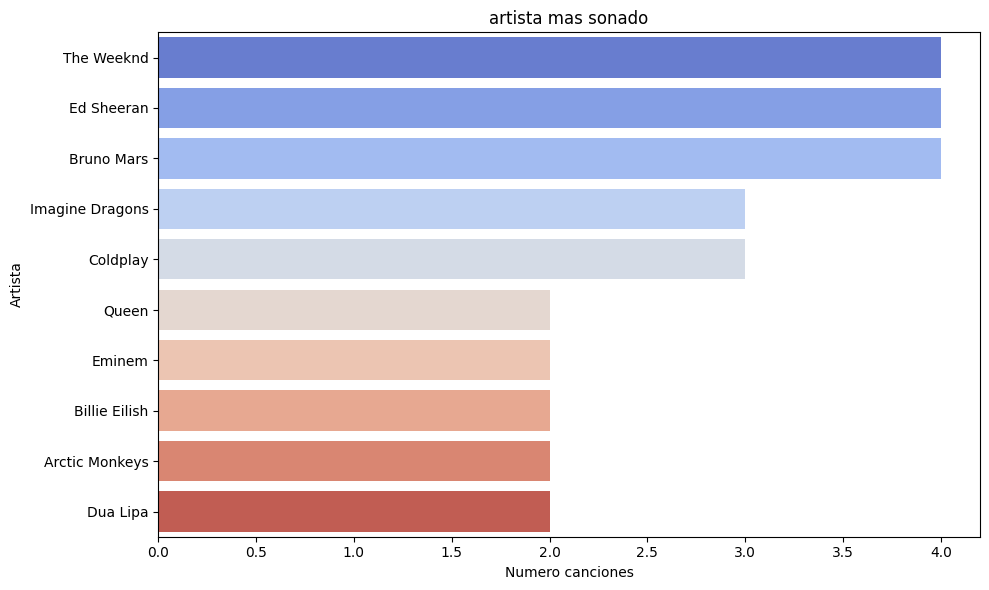

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=artists.values, y=artists.index, hue=artists.index, palette="coolwarm", legend=False)
plt.title("artista mas sonado")
plt.xlabel("Numero canciones")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()